TUGAS 1
> Image recognition using neural net (simple implementation neural net)

Team Member :

*   M. Taufiqul Huda (5022211007)
*   Muhammad Zain Irsyad (5022211142)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

INPUT_SIZE = 900
HIDDEN1_SIZE = 300
HIDDEN2_SIZE = 100
HIDDEN3_SIZE = 25
OUTPUT_SIZE = 5
LEARNING_RATE = 0.1
INPUT_COUNT = 60

class NeuralNetwork_3:
    def __init__(self):
        self.weights_input_hidden1 = np.zeros((INPUT_SIZE, HIDDEN1_SIZE))
        self.bias_hidden1 = np.zeros(HIDDEN1_SIZE)
        self.weights_hidden1_hidden2 = np.zeros((HIDDEN1_SIZE, HIDDEN2_SIZE))
        self.bias_hidden2 = np.zeros(HIDDEN2_SIZE)
        self.weights_hidden2_hidden3 = np.zeros((HIDDEN2_SIZE, HIDDEN3_SIZE))
        self.bias_hidden3 = np.zeros(HIDDEN3_SIZE)
        self.weights_hidden3_output = np.zeros((HIDDEN3_SIZE, OUTPUT_SIZE))
        self.bias_output = np.zeros(OUTPUT_SIZE)

class NeuralNetwork_2:
    def __init__(self):
        self.weights_input_hidden1 = np.zeros((INPUT_SIZE, HIDDEN1_SIZE))
        self.bias_hidden1 = np.zeros(HIDDEN1_SIZE)
        self.weights_hidden1_hidden2 = np.zeros((HIDDEN1_SIZE, HIDDEN2_SIZE))
        self.bias_hidden2 = np.zeros(HIDDEN2_SIZE)
        self.weights_hidden2_output = np.zeros((HIDDEN2_SIZE, OUTPUT_SIZE))
        self.bias_output = np.zeros(OUTPUT_SIZE)

class NeuralNetwork_1:
    def __init__(self):
        self.weights_input_hidden1 = np.zeros((INPUT_SIZE, HIDDEN1_SIZE))
        self.bias_hidden1 = np.zeros(HIDDEN1_SIZE)
        self.weights_hidden1_output = np.zeros((HIDDEN1_SIZE, OUTPUT_SIZE))
        self.bias_output = np.zeros(OUTPUT_SIZE)


Neural Network Functions

In [ ]:
def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1.0 - x)

def nn_init_3(NeuralNetwork_3):
  for i in range(INPUT_SIZE):
    for j in range(HIDDEN1_SIZE):
        NeuralNetwork_3.weights_input_hidden1[i][j] = np.random.rand() * 2 - 1
  for i in range(HIDDEN1_SIZE):
      NeuralNetwork_3.bias_hidden1[i] = np.random.rand() * 2 - 1
      for j in range(HIDDEN2_SIZE):
          NeuralNetwork_3.weights_hidden1_hidden2[i][j] = np.random.rand() * 2 - 1
  for i in range(HIDDEN2_SIZE):
      NeuralNetwork_3.bias_hidden2[i] = np.random.rand() * 2 - 1
      for j in range(HIDDEN3_SIZE):
          NeuralNetwork_3.weights_hidden2_hidden3[i][j] = np.random.rand() * 2 - 1
  for i in range(HIDDEN3_SIZE):
      NeuralNetwork_3.bias_hidden3[i] = np.random.rand() * 2 - 1
      for j in range(OUTPUT_SIZE):
          NeuralNetwork_3.weights_hidden3_output[i][j] = np.random.rand() * 2 - 1
  for i in range(OUTPUT_SIZE):
      NeuralNetwork_3.bias_output[i] = np.random.rand() * 2 - 1

def predict_with_confidence_3(inputs, NeuralNetwork_3):
  hidden_layer1 = np.zeros(HIDDEN1_SIZE)
  mac = 0
  for j in range(HIDDEN1_SIZE):
      net = 0
      for k in range(INPUT_SIZE):
          net += inputs[k] * NeuralNetwork_3.weights_input_hidden1[k][j]
          mac += 1
      net += NeuralNetwork_3.bias_hidden1[j]
      hidden_layer1[j] = sigmoid(net)

  hidden_layer2 = np.zeros(HIDDEN2_SIZE)
  for j in range(HIDDEN2_SIZE):
      net = 0
      for k in range(HIDDEN1_SIZE):
          net += hidden_layer1[k] * NeuralNetwork_3.weights_hidden1_hidden2[k][j]
          mac += 1
      net += NeuralNetwork_3.bias_hidden2[j]
      hidden_layer2[j] = sigmoid(net)

  hidden_layer3 = np.zeros(HIDDEN3_SIZE)
  for j in range(HIDDEN3_SIZE):
      net = 0
      for k in range(HIDDEN2_SIZE):
          net += hidden_layer2[k] * NeuralNetwork_3.weights_hidden2_hidden3[k][j]
          mac += 1
      net += NeuralNetwork_3.bias_hidden3[j]
      hidden_layer3[j] = sigmoid(net)

  output_layer = np.zeros(OUTPUT_SIZE)
  for j in range(OUTPUT_SIZE):
      net = 0
      for k in range(HIDDEN3_SIZE):
          net += hidden_layer3[k] * NeuralNetwork_3.weights_hidden3_output[k][j]
          mac += 1
      net += NeuralNetwork_3.bias_output[j]
      output_layer[j] = sigmoid(net)
  print(output_layer)
  max_output = output_layer[0]
  max_index = 0
  for i in range(1, OUTPUT_SIZE):
      if output_layer[i] > max_output:
          max_output = output_layer[i]
          max_index = i

  member = ['H','Q','T','Y','Z']

  return member[max_index], max_index, max_output


def train_3(inputs, targets, NeuralNetwork_3):
  mac = 0
  err_record = []
  acc_record = []
  for epoch in range(100):
      total_error = 0
      for i in range(INPUT_COUNT):
          # Forward pass
          hidden_layer1 = np.zeros(HIDDEN1_SIZE)
          for j in range(HIDDEN1_SIZE):
              net = 0
              for k in range(INPUT_SIZE):
                  net += inputs[i][k] * NeuralNetwork_3.weights_input_hidden1[k][j]
                  mac += 1
              net += NeuralNetwork_3.bias_hidden1[j]
              hidden_layer1[j] = sigmoid(net)

          hidden_layer2 = np.zeros(HIDDEN2_SIZE)
          for j in range(HIDDEN2_SIZE):
              net = 0
              for k in range(HIDDEN1_SIZE):
                  net += hidden_layer1[k] * NeuralNetwork_3.weights_hidden1_hidden2[k][j]
                  mac += 1
              net += NeuralNetwork_3.bias_hidden2[j]
              hidden_layer2[j] = sigmoid(net)

          hidden_layer3 = np.zeros(HIDDEN3_SIZE)
          for j in range(HIDDEN3_SIZE):
              net = 0
              for k in range(HIDDEN2_SIZE):
                  net += hidden_layer2[k] * NeuralNetwork_3.weights_hidden2_hidden3[k][j]
                  mac += 1
              net += NeuralNetwork_3.bias_hidden3[j]
              hidden_layer3[j] = sigmoid(net)

          output_layer = np.zeros(OUTPUT_SIZE)
          for j in range(OUTPUT_SIZE):
              net = 0
              for k in range(HIDDEN3_SIZE):
                  net += hidden_layer3[k] * NeuralNetwork_3.weights_hidden3_output[k][j]
                  mac += 1
              net += NeuralNetwork_3.bias_output[j]
              output_layer[j] = sigmoid(net)


          # Calculate error
          error = np.zeros(OUTPUT_SIZE)
          for j in range(OUTPUT_SIZE):
              error[j] = (1 - output_layer[j]) if targets[i] == j else (0 - output_layer[j])
              total_error += error[j] * error[j]

          # Backward pass - update weights and biases
          output_delta = np.zeros(OUTPUT_SIZE)
          for j in range(OUTPUT_SIZE):
              output_delta[j] = error[j] * sigmoid_derivative(output_layer[j])
              for k in range(HIDDEN3_SIZE):
                  NeuralNetwork_3.weights_hidden3_output[k][j] += LEARNING_RATE * output_delta[j] * hidden_layer3[k]
                  mac += 1
              NeuralNetwork_3.bias_output[j] += LEARNING_RATE * output_delta[j]
              mac += 1

          hidden3_delta = np.zeros(HIDDEN3_SIZE)
          for j in range(HIDDEN3_SIZE):
              temp = 0
              for k in range(OUTPUT_SIZE):
                  temp += output_delta[k] * NeuralNetwork_3.weights_hidden3_output[j][k]
                  mac += 1
              hidden3_delta[j] = temp * sigmoid_derivative(hidden_layer3[j])
              for k in range(HIDDEN2_SIZE):
                  NeuralNetwork_3.weights_hidden2_hidden3[k][j] += LEARNING_RATE * hidden3_delta[j] * hidden_layer2[k]
                  mac += 1
              NeuralNetwork_3.bias_hidden3[j] += LEARNING_RATE * hidden3_delta[j]
              mac += 1

          hidden2_delta = np.zeros(HIDDEN2_SIZE)
          for j in range(HIDDEN2_SIZE):
              temp = 0
              for k in range(HIDDEN3_SIZE):
                  temp += hidden3_delta[k] * NeuralNetwork_3.weights_hidden2_hidden3[j][k]
                  mac += 1
              hidden2_delta[j] = temp * sigmoid_derivative(hidden_layer2[j])
              for k in range(HIDDEN1_SIZE):
                  NeuralNetwork_3.weights_hidden1_hidden2[k][j] += LEARNING_RATE * hidden2_delta[j] * hidden_layer1[k]
                  mac += 1
              NeuralNetwork_3.bias_hidden2[j] += LEARNING_RATE * hidden2_delta[j]
              mac += 1

          for j in range(HIDDEN1_SIZE):
              temp = 0
              for k in range(HIDDEN2_SIZE):
                  temp += hidden2_delta[k] * NeuralNetwork_3.weights_hidden1_hidden2[j][k]
                  mac += 1
              hidden1_delta = temp * sigmoid_derivative(hidden_layer1[j])
              for k in range(INPUT_SIZE):
                  NeuralNetwork_3.weights_input_hidden1[k][j] += LEARNING_RATE * hidden1_delta * inputs[i][k]
                  mac += 1
              NeuralNetwork_3.bias_hidden1[j] += LEARNING_RATE * hidden1_delta
              mac += 1

      total_error /= INPUT_COUNT  # Number of training data
      print("epochs : ", epoch)
      print("error : ", total_error)
      print("mac : ", mac)
      err_record.append(total_error)
      acc_record.append((1-np.sqrt(total_error)))

      if total_error < 0.005:  # Stopping criteria
          break
  x = np.arange(1, len(err_record)+1)
  plt.title("Loss Graph")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(x, err_record, color ="blue")
  plt.show()
  x = np.arange(1, len(acc_record)+1)
  plt.title("Accuracy Graph")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.plot(x, acc_record, color ="green")
  plt.show()

def evaluate_training_results_3(NeuralNetwork_3, inputs, targets):
    correct_count = 0
    for i in range(INPUT_COUNT):
        prediction = predict_with_confidence_3(inputs[i], NeuralNetwork_3)
        target_classes = targets[i]
        if prediction.classes == target_classes:
            correct_count += 1
    accuracy = correct_count / INPUT_COUNT * 100
    return accuracy

def nn_init_2(NeuralNetwork_2):
  for i in range(INPUT_SIZE):
      for j in range(HIDDEN1_SIZE):
          NeuralNetwork_2.weights_input_hidden1[i][j] = np.random.rand() * 2 - 1
  for i in range(HIDDEN1_SIZE):
      NeuralNetwork_2.bias_hidden1[i] = np.random.rand() * 2 - 1
      for j in range(HIDDEN2_SIZE):
          NeuralNetwork_2.weights_hidden1_hidden2[i][j] = np.random.rand() * 2 - 1
  for i in range(HIDDEN2_SIZE):
      NeuralNetwork_2.bias_hidden2[i] = np.random.rand() * 2 - 1
      for j in range(OUTPUT_SIZE):
          NeuralNetwork_2.weights_hidden2_output[i][j] = np.random.rand() * 2 - 1
  for i in range(OUTPUT_SIZE):
      NeuralNetwork_2.bias_output[i] = np.random.rand() * 2 - 1

def predict_with_confidence_2(inputs, NeuralNetwork_2):
  hidden_layer1 = np.zeros(HIDDEN1_SIZE)
  mac = 0
  for j in range(HIDDEN1_SIZE):
      net = 0
      for k in range(INPUT_SIZE):
          net += inputs[k] * NeuralNetwork_2.weights_input_hidden1[k][j]
          mac += 1
      net += NeuralNetwork_2.bias_hidden1[j]
      hidden_layer1[j] = sigmoid(net)

  hidden_layer2 = np.zeros(HIDDEN2_SIZE)
  for j in range(HIDDEN2_SIZE):
      net = 0
      for k in range(HIDDEN1_SIZE):
          net += hidden_layer1[k] * NeuralNetwork_2.weights_hidden1_hidden2[k][j]
          mac += 1
      net += NeuralNetwork_2.bias_hidden2[j]
      hidden_layer2[j] = sigmoid(net)

  output_layer = np.zeros(OUTPUT_SIZE)
  for j in range(OUTPUT_SIZE):
      net = 0
      for k in range(HIDDEN2_SIZE):
          net += hidden_layer2[k] * NeuralNetwork_2.weights_hidden2_output[k][j]
          mac += 1
      net += NeuralNetwork_2.bias_output[j]
      output_layer[j] = sigmoid(net)
  print(output_layer)
  max_output = output_layer[0]
  max_index = 0
  for i in range(1, OUTPUT_SIZE):
      if output_layer[i] > max_output:
          max_output = output_layer[i]
          max_index = i

  member = ['H','Q','T','Y','Z']

  return member[max_index], max_index, max_output


def train_2(inputs, targets, NeuralNetwork_2):
  mac = 0
  err_record = []
  acc_record = []
  for epoch in range(100):
      total_error = 0
      for i in range(INPUT_COUNT):
          # Forward pass
          hidden_layer1 = np.zeros(HIDDEN1_SIZE)
          for j in range(HIDDEN1_SIZE):
              net = 0
              for k in range(INPUT_SIZE):
                  net += inputs[i][k] * NeuralNetwork_2.weights_input_hidden1[k][j]
                  mac += 1
              net += NeuralNetwork_2.bias_hidden1[j]
              hidden_layer1[j] = sigmoid(net)

          hidden_layer2 = np.zeros(HIDDEN2_SIZE)
          for j in range(HIDDEN2_SIZE):
              net = 0
              for k in range(HIDDEN1_SIZE):
                  net += hidden_layer1[k] * NeuralNetwork_2.weights_hidden1_hidden2[k][j]
                  mac += 1
              net += NeuralNetwork_2.bias_hidden2[j]
              hidden_layer2[j] = sigmoid(net)

          output_layer = np.zeros(OUTPUT_SIZE)
          for j in range(OUTPUT_SIZE):
              net = 0
              for k in range(HIDDEN2_SIZE):
                  net += hidden_layer2[k] * NeuralNetwork_2.weights_hidden2_output[k][j]
                  mac += 1
              net += NeuralNetwork_2.bias_output[j]
              output_layer[j] = sigmoid(net)


          # Calculate error
          error = np.zeros(OUTPUT_SIZE)
          for j in range(OUTPUT_SIZE):
              error[j] = (1 - output_layer[j]) if targets[i] == j else (0 - output_layer[j])
              total_error += error[j] * error[j]

          # Backward pass - update weights and biases
          output_delta = np.zeros(OUTPUT_SIZE)
          for j in range(OUTPUT_SIZE):
              output_delta[j] = error[j] * sigmoid_derivative(output_layer[j])
              for k in range(HIDDEN2_SIZE):
                  NeuralNetwork_2.weights_hidden2_output[k][j] += LEARNING_RATE * output_delta[j] * hidden_layer2[k]
                  mac += 1
              NeuralNetwork_2.bias_output[j] += LEARNING_RATE * output_delta[j]
              mac += 1

          hidden2_delta = np.zeros(HIDDEN2_SIZE)
          for j in range(HIDDEN2_SIZE):
              temp = 0
              for k in range(OUTPUT_SIZE):
                  temp += output_delta[k] * NeuralNetwork_2.weights_hidden2_output[j][k]
                  mac += 1
              hidden2_delta[j] = temp * sigmoid_derivative(hidden_layer2[j])
              for k in range(HIDDEN1_SIZE):
                  NeuralNetwork_2.weights_hidden1_hidden2[k][j] += LEARNING_RATE * hidden2_delta[j] * hidden_layer1[k]
                  mac += 1
              NeuralNetwork_2.bias_hidden2[j] += LEARNING_RATE * hidden2_delta[j]
              mac += 1

          for j in range(HIDDEN1_SIZE):
              temp = 0
              for k in range(HIDDEN2_SIZE):
                  temp += hidden2_delta[k] * NeuralNetwork_2.weights_hidden1_hidden2[j][k]
                  mac += 1
              hidden1_delta = temp * sigmoid_derivative(hidden_layer1[j])
              for k in range(INPUT_SIZE):
                  NeuralNetwork_2.weights_input_hidden1[k][j] += LEARNING_RATE * hidden1_delta * inputs[i][k]
                  mac += 1
              NeuralNetwork_2.bias_hidden1[j] += LEARNING_RATE * hidden1_delta
              mac += 1

      total_error /= INPUT_COUNT  # Number of training data
      print("epochs : ", epoch)
      print("error : ", total_error)
      print("mac : ", mac)

      err_record.append(total_error)
      acc_record.append((1-np.sqrt(total_error)))

      if total_error < 0.005:  # Stopping criteria
          break
  x = np.arange(1, len(err_record)+1)
  plt.title("Loss Graph")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(x, err_record, color ="blue")
  plt.show()
  x = np.arange(1, len(acc_record)+1)
  plt.title("Accuracy Graph")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.plot(x, acc_record, color ="green")
  plt.show()

def evaluate_training_results_2(NeuralNetwork_2, inputs, targets):
    correct_count = 0
    for i in range(INPUT_COUNT):
        prediction = predict_with_confidence_2(inputs[i], NeuralNetwork_2)
        target_classes = targets[i]
        if prediction.classes == target_classes:
            correct_count += 1
    accuracy = correct_count / INPUT_COUNT * 100
    return accuracy

def nn_init_1(NeuralNetwork_1):
  for i in range(INPUT_SIZE):
      for j in range(HIDDEN1_SIZE):
          NeuralNetwork_1.weights_input_hidden1[i][j] = np.random.rand() * 2 - 1
  for i in range(HIDDEN1_SIZE):
      NeuralNetwork_1.bias_hidden1[i] = np.random.rand() * 2 - 1
      for j in range(OUTPUT_SIZE):
          NeuralNetwork_1.weights_hidden1_output[i][j] = np.random.rand() * 2 - 1
  for i in range(OUTPUT_SIZE):
      NeuralNetwork_1.bias_output[i] = np.random.rand() * 2 - 1

def predict_with_confidence_1(inputs, NeuralNetwork_1):
  hidden_layer1 = np.zeros(HIDDEN1_SIZE)
  mac = 0
  for j in range(HIDDEN1_SIZE):
      net = 0
      for k in range(INPUT_SIZE):
          net += inputs[k] * NeuralNetwork_1.weights_input_hidden1[k][j]
          mac += 1
      net += NeuralNetwork_1.bias_hidden1[j]
      hidden_layer1[j] = sigmoid(net)

  output_layer = np.zeros(OUTPUT_SIZE)
  for j in range(OUTPUT_SIZE):
      net = 0
      for k in range(HIDDEN1_SIZE):
          net += hidden_layer1[k] * NeuralNetwork_1.weights_hidden1_output[k][j]
          mac += 1
      net += NeuralNetwork_1.bias_output[j]
      output_layer[j] = sigmoid(net)
  print(output_layer)
  max_output = output_layer[0]
  max_index = 0
  for i in range(1, OUTPUT_SIZE):
      if output_layer[i] > max_output:
          max_output = output_layer[i]
          max_index = i

  member = ['H','Q','T','Y','Z']

  return member[max_index], max_index, max_output

def train_1(inputs, targets, NeuralNetwork_1):
  mac = 0
  err_record = []
  acc_record = []
  for epoch in range(100):
      total_error = 0
      for i in range(INPUT_COUNT):
          # Forward pass
          hidden_layer1 = np.zeros(HIDDEN1_SIZE)
          for j in range(HIDDEN1_SIZE):
              net = 0
              for k in range(INPUT_SIZE):
                  net += inputs[i][k] * NeuralNetwork_1.weights_input_hidden1[k][j]
                  mac += 1
              net += NeuralNetwork_1.bias_hidden1[j]
              hidden_layer1[j] = sigmoid(net)

          output_layer = np.zeros(OUTPUT_SIZE)
          for j in range(OUTPUT_SIZE):
              net = 0
              for k in range(HIDDEN1_SIZE):
                  net += hidden_layer1[k] * NeuralNetwork_1.weights_hidden1_output[k][j]
                  mac += 1
              net += NeuralNetwork_1.bias_output[j]
              output_layer[j] = sigmoid(net)

          # Calculate error
          error = np.zeros(OUTPUT_SIZE)
          for j in range(OUTPUT_SIZE):
              error[j] = (1 - output_layer[j]) if targets[i] == j else (0 - output_layer[j])
              total_error += error[j] * error[j]

          # Backward pass - update weights and biases
          output_delta = np.zeros(OUTPUT_SIZE)
          for j in range(OUTPUT_SIZE):
              output_delta[j] = error[j] * sigmoid_derivative(output_layer[j])
              for k in range(HIDDEN1_SIZE):
                  NeuralNetwork_1.weights_hidden1_output[k][j] += LEARNING_RATE * output_delta[j] * hidden_layer1[k]
                  mac += 1
              NeuralNetwork_1.bias_output[j] += LEARNING_RATE * output_delta[j]
              mac += 1

          for j in range(HIDDEN1_SIZE):
              temp = 0
              for k in range(OUTPUT_SIZE):
                  temp += output_delta[k] * NeuralNetwork_1.weights_hidden1_output[j][k]
                  mac += 1
              hidden1_delta = temp * sigmoid_derivative(hidden_layer1[j])
              for k in range(INPUT_SIZE):
                  NeuralNetwork_1.weights_input_hidden1[k][j] += LEARNING_RATE * hidden1_delta * inputs[i][k]
                  mac += 1
              NeuralNetwork_1.bias_hidden1[j] += LEARNING_RATE * hidden1_delta
              mac += 1

      total_error /= INPUT_COUNT  # Number of training data
      print("epochs : ", epoch)
      print("error : ", total_error)
      print("mac : ", mac)

      err_record.append(total_error)
      acc_record.append((1-np.sqrt(total_error)))

      if total_error < 0.005:  # Stopping criteria
          break
  x = np.arange(1, len(err_record)+1)
  plt.title("Loss Graph")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(x, err_record, color ="blue")
  plt.show()
  x = np.arange(1, len(acc_record)+1)
  plt.title("Accuracy Graph")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.plot(x, acc_record, color ="green")
  plt.show()

def evaluate_training_results_2(NeuralNetwork_1, inputs, targets):
    correct_count = 0
    for i in range(INPUT_COUNT):
        prediction = predict_with_confidence_1(inputs[i], NeuralNetwork_1)
        target_classes = targets[i]
        if prediction.classes == target_classes:
            correct_count += 1
    accuracy = correct_count / INPUT_COUNT * 100
    return accuracy


In [ ]:
def normalize(arr, t_min=0, t_max=1):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr
def resize_image(image, size=(30, 30)):
  img_resized = cv2.resize(image, size)
  return img_resized
def flatten_array(array_2d):
  return array_2d.flatten().reshape(1, -1)
def get_image():
  kernel = np.ones((5,5),np.uint8)
  member = ['H','Q','T','Y','Z']
  dataset = np.zeros((2, len(member) * 12), dtype=object)
  cnt = 0
  cls = 0
  for i in member:
    for j in range(1, 13):
      img = cv2.imread("/content/drive/MyDrive/DATA SET/"+ str(i) + '/' + str(j) + ".PNG", cv2.IMREAD_GRAYSCALE)
      if img is not None:
          ret, img_bin = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY_INV)
          dilation = cv2.dilate(img_bin, kernel, iterations = 5)
          img_buf = resize_image(dilation)
          dataset[0][cnt] = normalize(img_buf.flatten())
          dataset[1][cnt] = cls
          cnt += 1
          plt.imshow(resize_image(img_buf, (500,500)))
          plt.show()
          print("berhasil")
      else:
          print(f"Gagal membaca gambar: /content/drive/MyDrive/DATA SET/{i}/{j}.PNG")
    cls += 1
  return dataset
def load_image(path):
  kernel = np.ones((5,5),np.uint8)
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  ret, img_bin = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY_INV)
  dilation = cv2.dilate(img_bin, kernel, iterations = 5)
  img_buf = resize_image(dilation)
  return normalize(img_buf.flatten())

def image_test(layer):
  kernel = np.ones((5,5),np.uint8)
  member = ['H','Q','T','Y','Z']
  result = np.zeros((len(member), len(member)), dtype=float)
  cnt = 0
  cls = 0
  for i in member:
    for j in range(13, 16):
      img = cv2.imread("/content/drive/MyDrive/DATA SET/"+ str(i) + '/' + str(j) + ".PNG", cv2.IMREAD_GRAYSCALE)
      if img is not None:
          ret, img_bin = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY_INV)
          dilation = cv2.dilate(img_bin, kernel, iterations = 5)
          img_buf = resize_image(dilation)
          if layer == 1:
            huruf, pred, conf = predict_with_confidence_1(normalize(img_buf.flatten()),nn1)
          elif layer == 2:
            huruf, pred, conf = predict_with_confidence_2(normalize(img_buf.flatten()),nn2)
          else:
            huruf, pred, conf = predict_with_confidence_3(normalize(img_buf.flatten()),nn3)

          result[cls][pred] += 1
          cnt += 1
          print("berhasil")
      else:
          print(f"Gagal membaca gambar: /content/drive/MyDrive/DATA SET/{i}/{j}.PNG")
    cls += 1
  plt.imshow(result, alpha=0.9, cmap='YlGn_r')
  #for tick numbers and labels
  for i in range(result.shape[0]):
    for j in range(result.shape[1]):
      plt.text(j, i, result[i, j], ha='center', va='center', color='r')
  plt.xticks()
  plt.yticks()
  plt.xlabel('Prediksi')
  plt.ylabel('Aktual')
  plt.title('Confusion Matrix')
  plt.show()
  return result

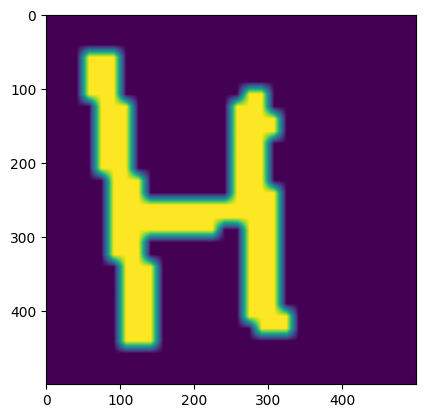

berhasil


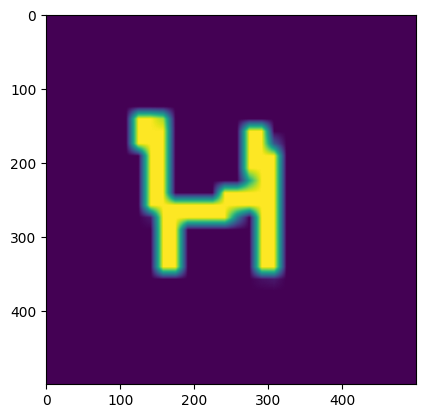

berhasil


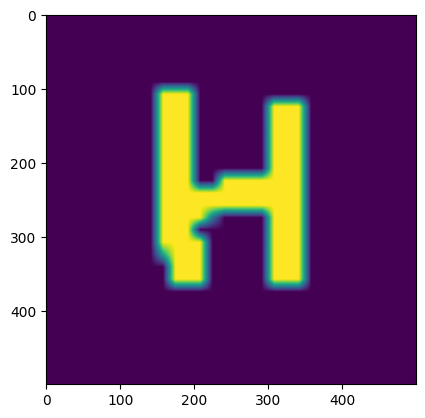

berhasil


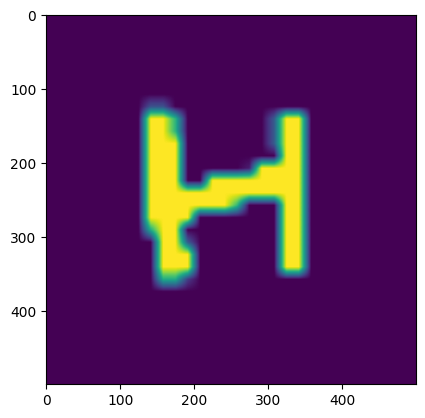

berhasil


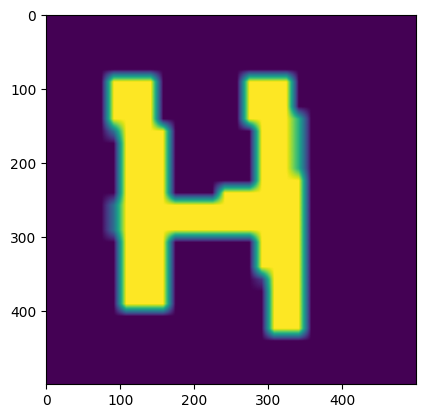

berhasil


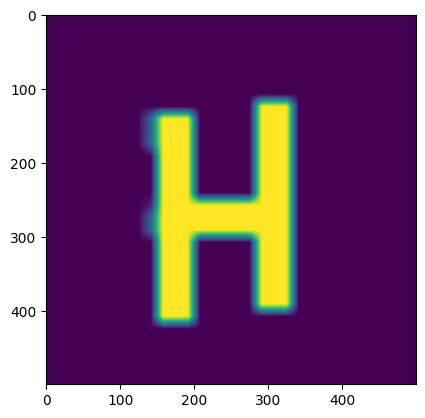

berhasil


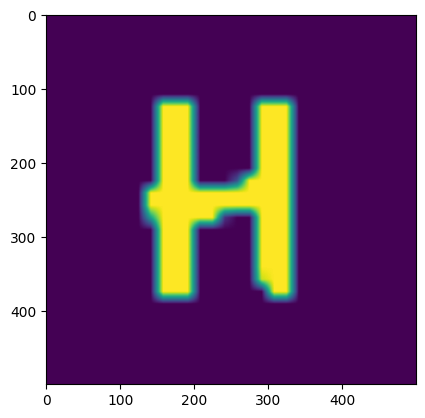

berhasil


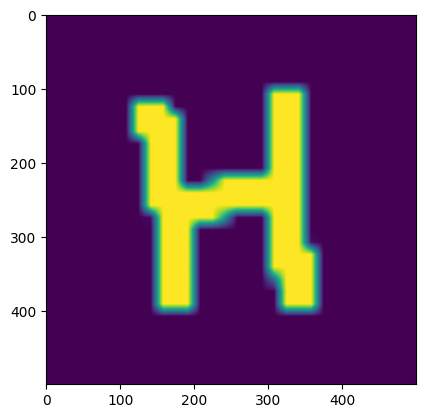

berhasil


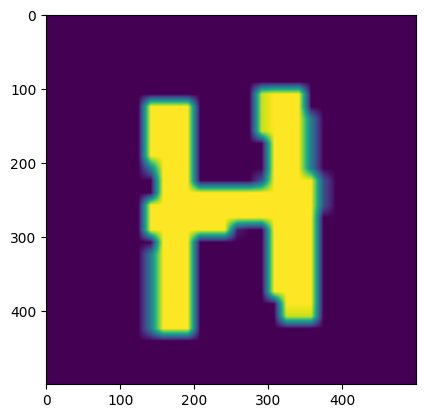

berhasil


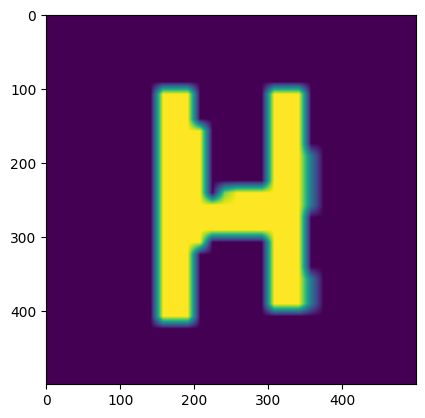

berhasil


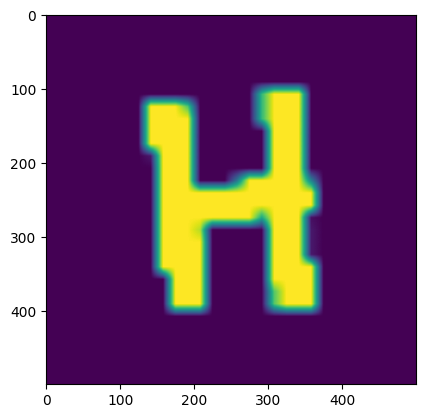

berhasil


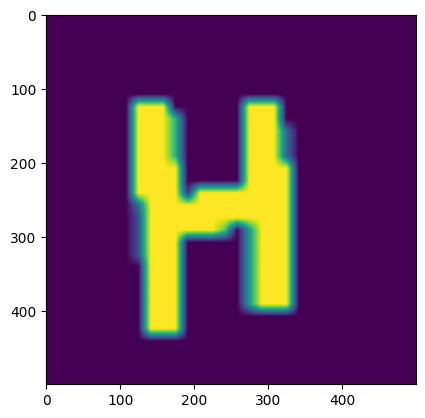

berhasil


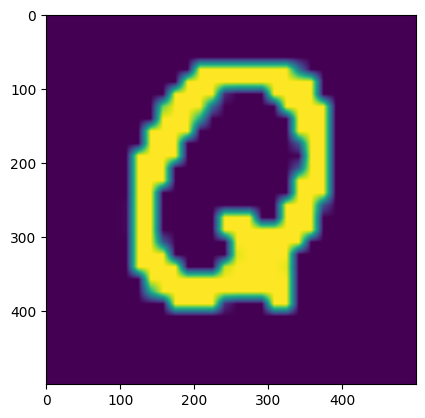

berhasil


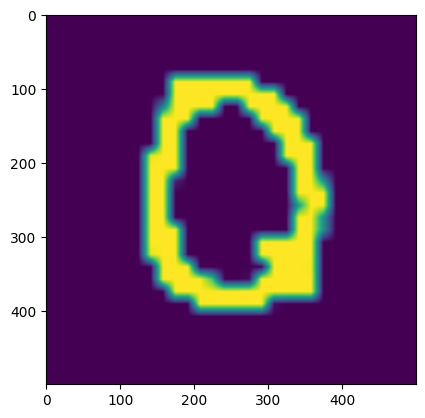

berhasil


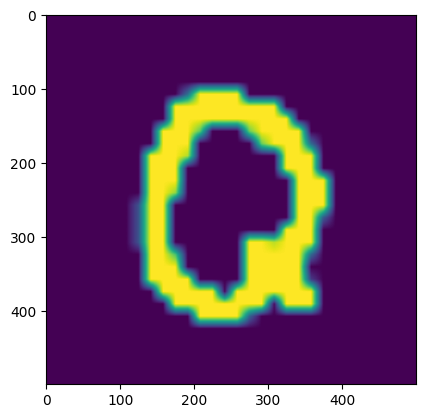

berhasil


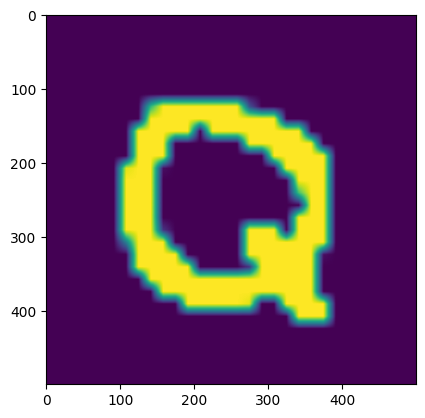

berhasil


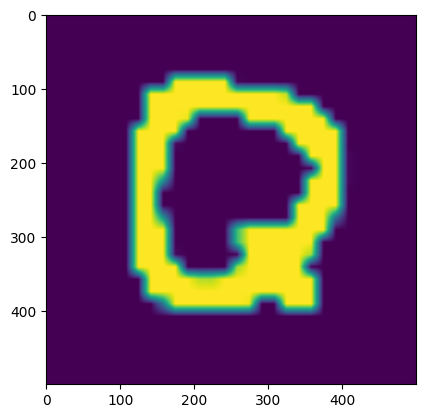

berhasil


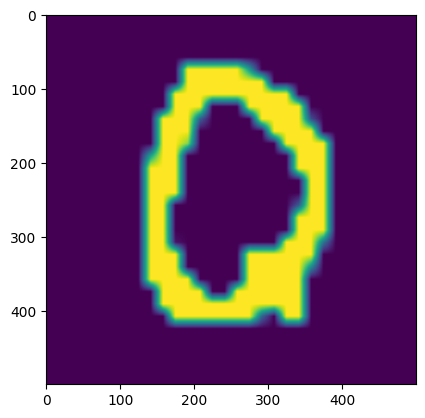

berhasil


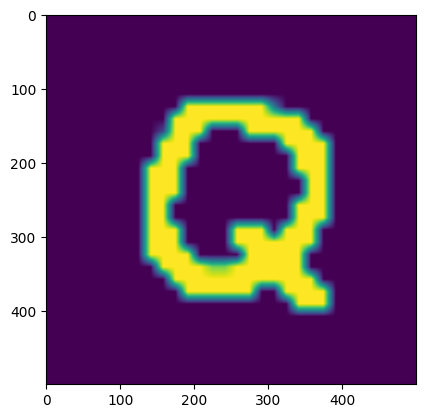

berhasil


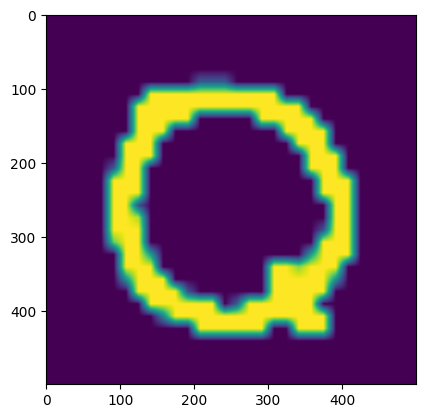

berhasil


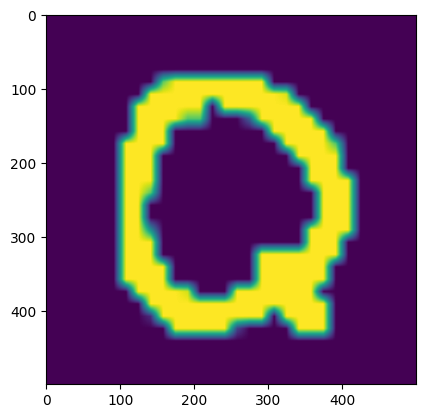

berhasil


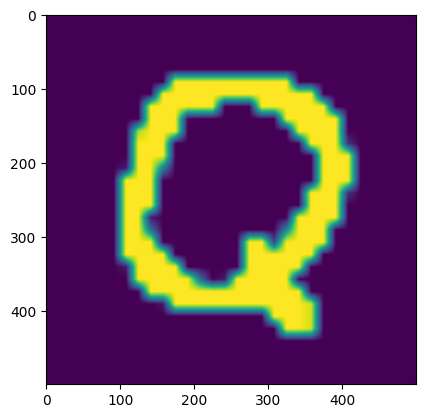

berhasil


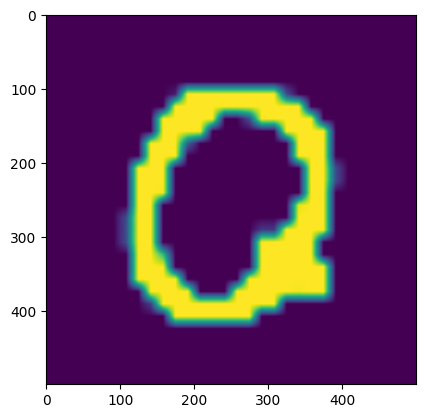

berhasil


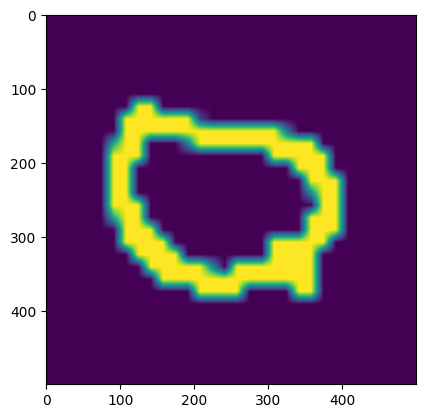

berhasil


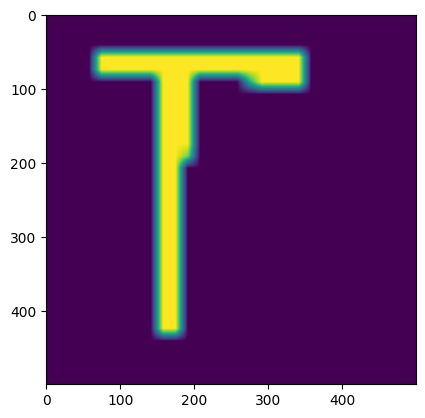

berhasil


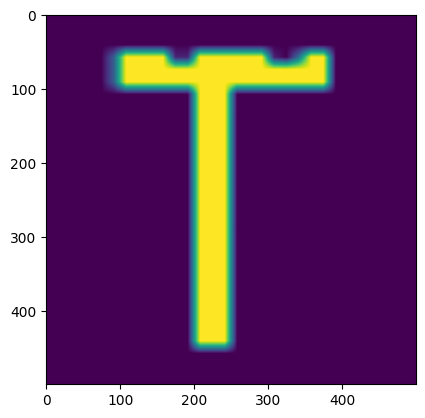

berhasil


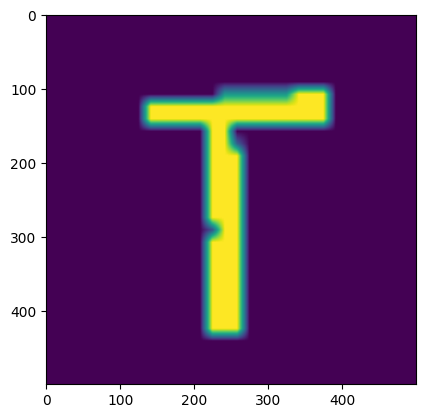

berhasil


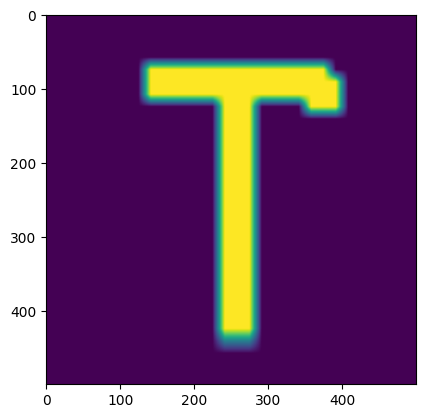

berhasil


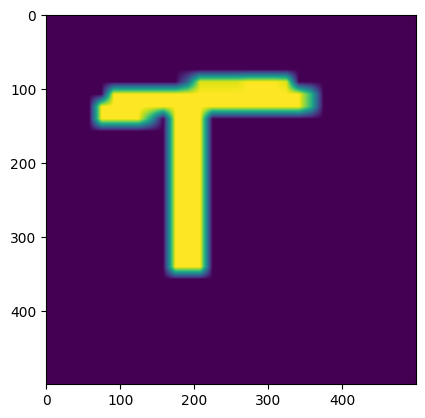

berhasil


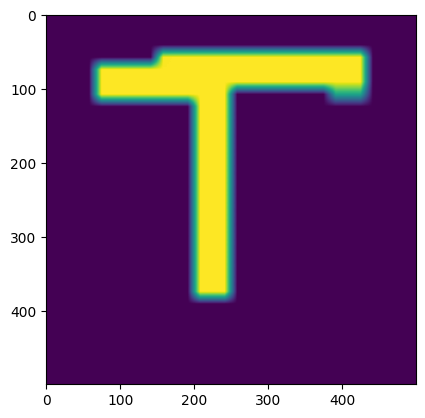

berhasil


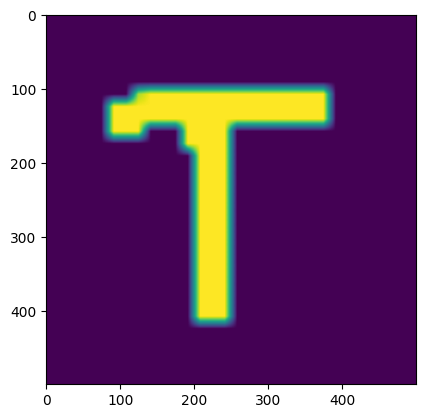

berhasil


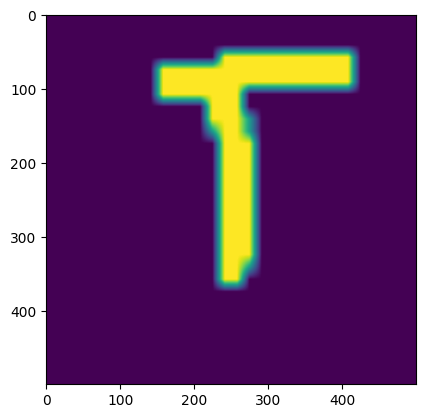

berhasil


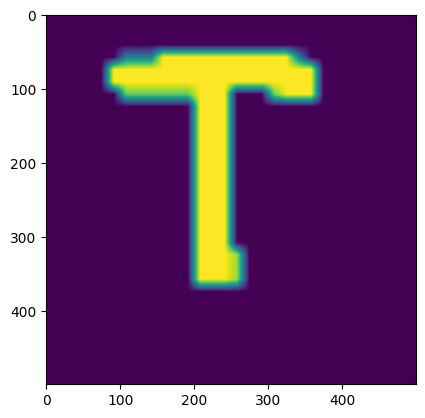

berhasil


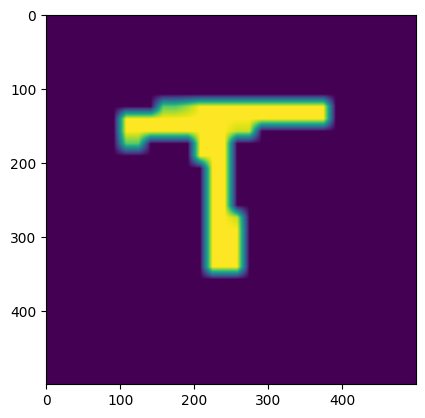

berhasil


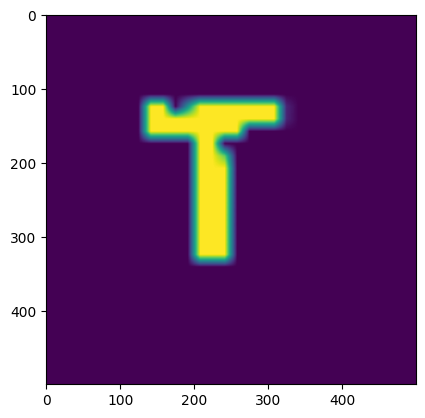

berhasil


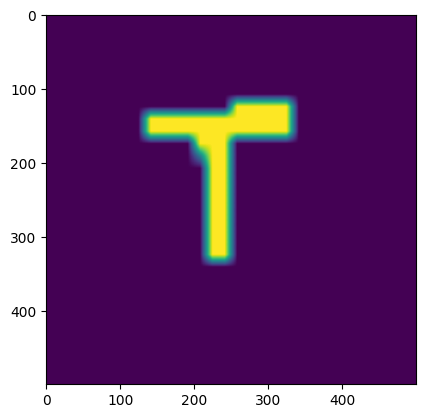

berhasil


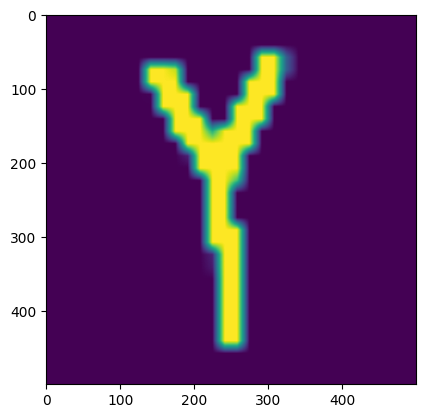

berhasil


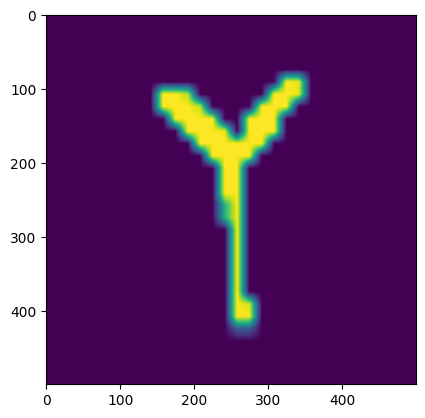

berhasil


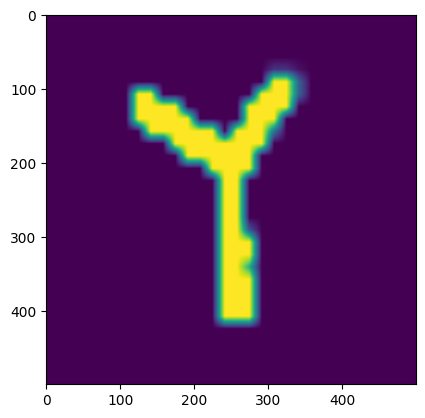

berhasil


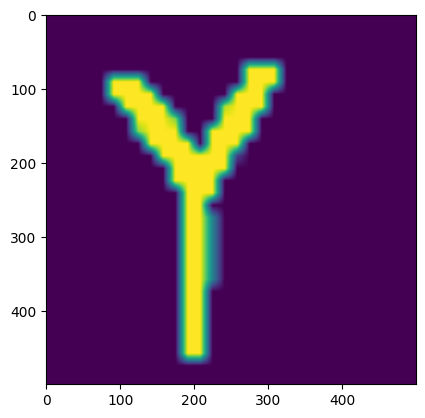

berhasil


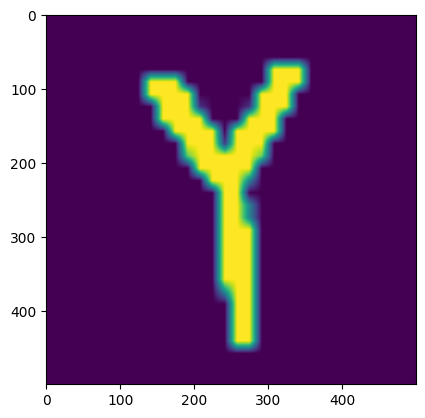

berhasil


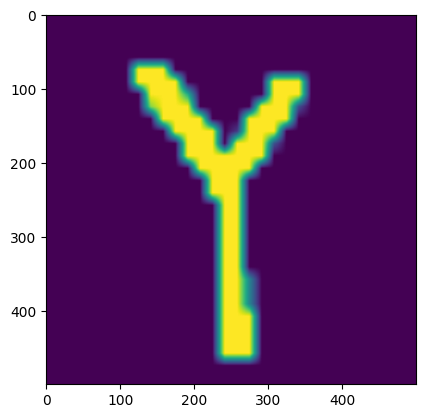

berhasil


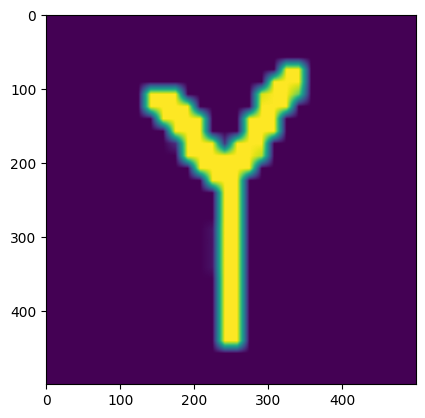

berhasil


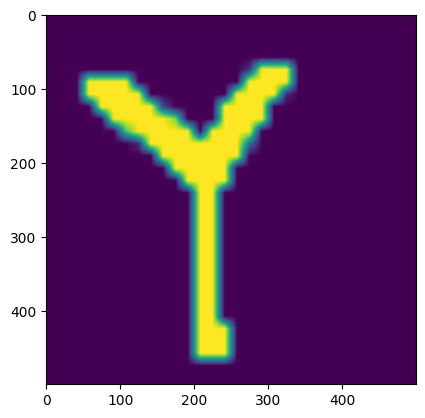

berhasil


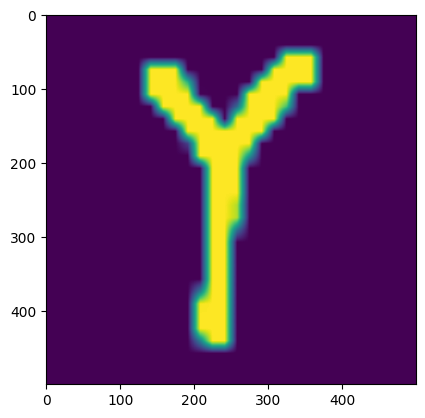

berhasil


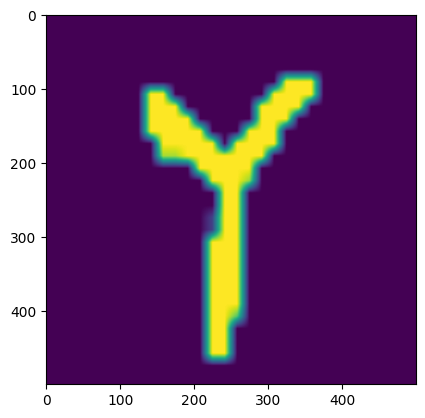

berhasil


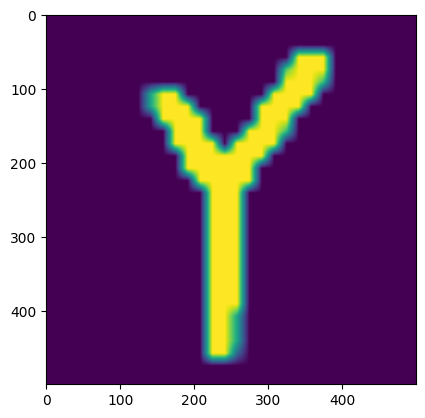

berhasil


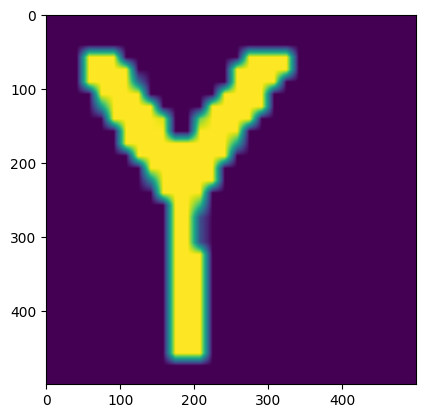

berhasil


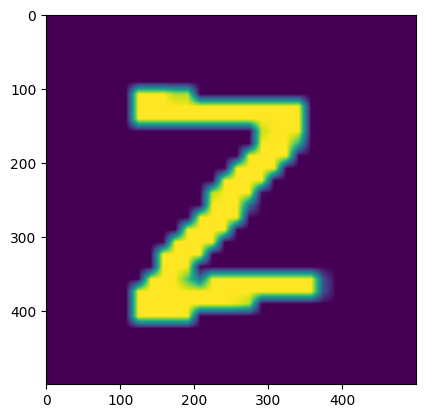

berhasil


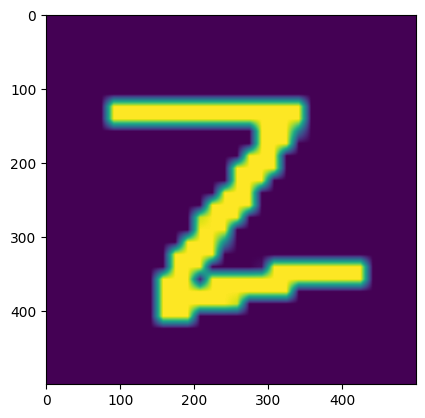

berhasil


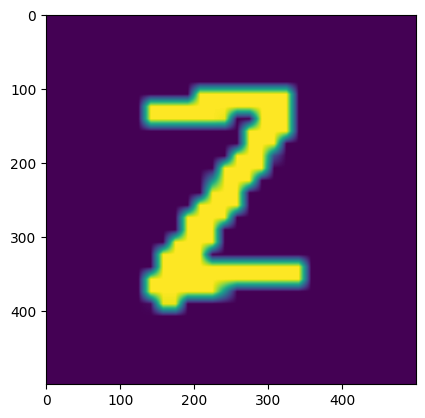

berhasil


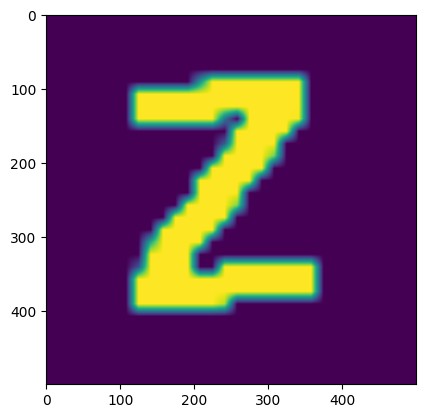

berhasil


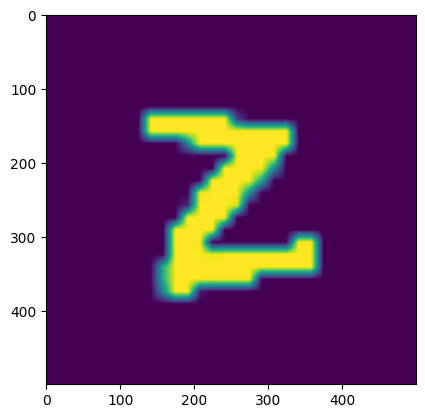

berhasil


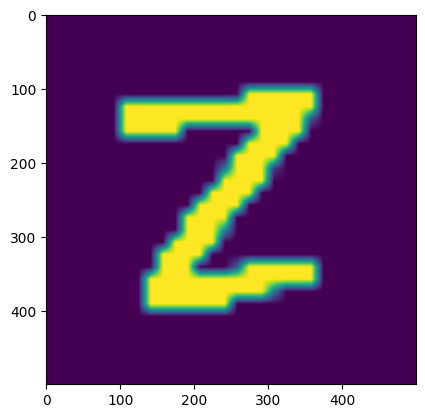

berhasil


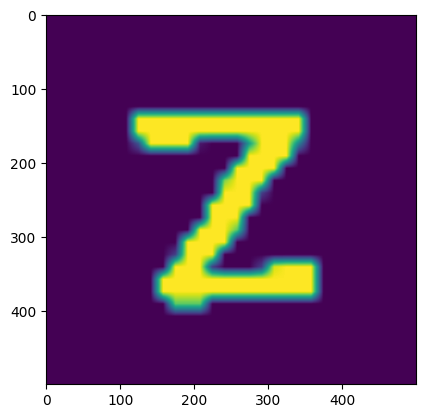

berhasil


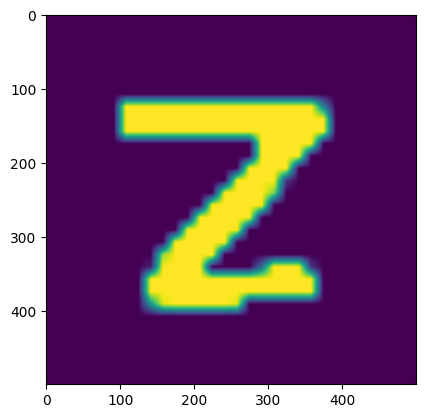

berhasil


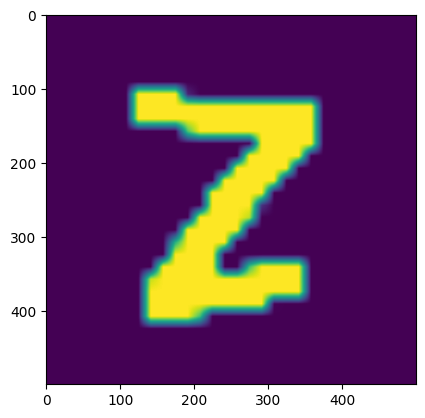

berhasil


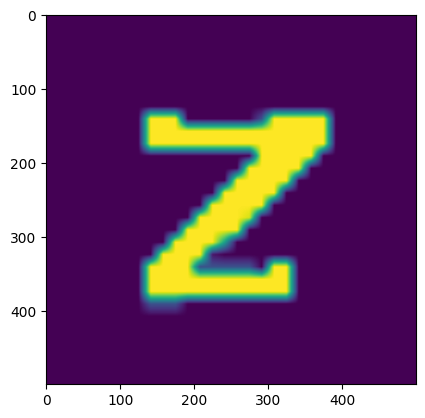

berhasil


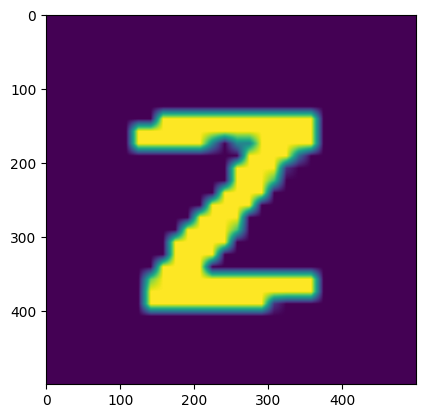

berhasil


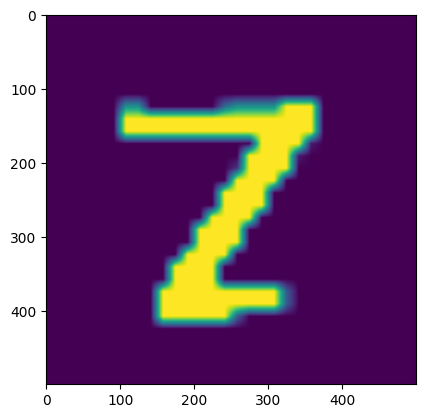

berhasil


In [ ]:
ret = get_image()

#**Neural Network 1 Layer Tersembunyi**
Epoch akan dibatasi hingga 100 saja dan otomatis berhenti ketika loss bernilai 0,005.Output dari program ini adalah grafik loss, grafik akurasi, dan confusion matrix.


epochs :  0
error :  1.1015970059752624
mac :  32688300
epochs :  1
error :  0.7828609147771686
mac :  65376600
epochs :  2
error :  0.6362175357749817
mac :  98064900
epochs :  3
error :  0.5561827501562246
mac :  130753200
epochs :  4
error :  0.4988703031283256
mac :  163441500
epochs :  5
error :  0.4380609894188888
mac :  196129800
epochs :  6
error :  0.38943044285797723
mac :  228818100
epochs :  7
error :  0.30902848435933805
mac :  261506400
epochs :  8
error :  0.2831782166762106
mac :  294194700
epochs :  9
error :  0.26747812005254346
mac :  326883000
epochs :  10
error :  0.24948972380184503
mac :  359571300
epochs :  11
error :  0.24122274993104162
mac :  392259600
epochs :  12
error :  0.2378511996234361
mac :  424947900
epochs :  13
error :  0.23650691647561453
mac :  457636200
epochs :  14
error :  0.2356360028202735
mac :  490324500
epochs :  15
error :  0.23485512880952175
mac :  523012800
epochs :  16
error :  0.2338263451560908
mac :  555701100
epochs :  17
error :

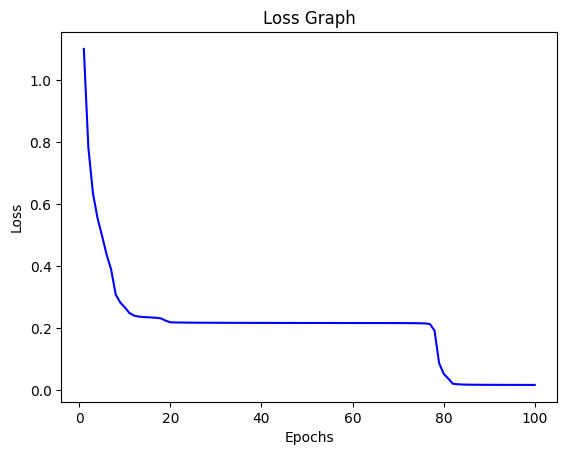

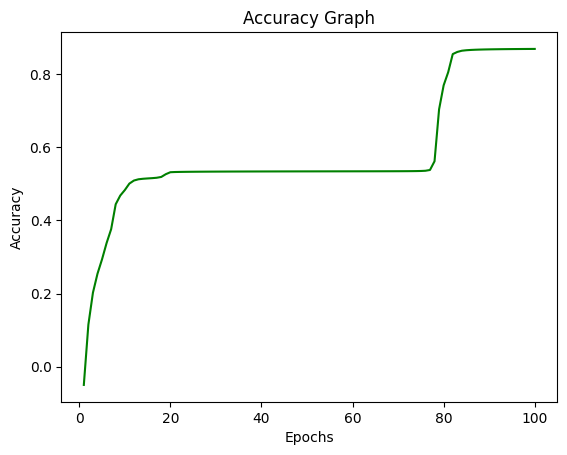

[9.93778813e-01 3.35077554e-03 2.30057225e-05 1.49176305e-02
 4.80953138e-03]
berhasil
[9.89575171e-01 4.88099909e-04 1.12057735e-04 6.29476775e-04
 2.92086043e-02]
berhasil
[9.68026278e-01 2.39492901e-06 4.50994363e-04 3.73083500e-04
 7.58640432e-04]
berhasil
[3.53233538e-05 9.57412296e-01 1.36511759e-03 7.91417639e-05
 1.59141539e-03]
berhasil
[2.56616731e-04 8.00221413e-01 1.04305967e-03 1.44614445e-06
 8.00166446e-04]
berhasil
[6.49596432e-06 1.68058188e-01 2.86075504e-04 1.54224972e-01
 3.81078173e-01]
berhasil
[1.72892902e-06 7.26709848e-05 8.01283943e-01 7.91515989e-01
 5.96968823e-02]
berhasil
[1.65928159e-04 6.88392407e-05 2.53736987e-01 1.59625225e-02
 9.84662234e-01]
berhasil
[1.83874113e-04 7.43768488e-06 3.60869105e-01 6.43664742e-03
 2.53059745e-02]
berhasil
[3.33151828e-04 1.14057569e-07 7.09623346e-03 9.73560891e-01
 1.63153115e-02]
berhasil
[1.96187232e-04 4.54796736e-06 4.87869597e-03 9.96220590e-01
 2.01753293e-04]
berhasil
[4.00964329e-02 6.02140777e-08 2.19594060e-

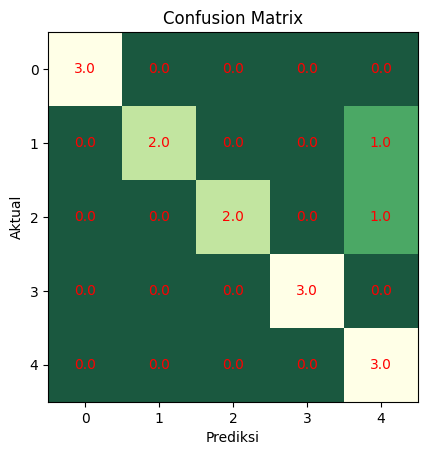

array([[3., 0., 0., 0., 0.],
       [0., 2., 0., 0., 1.],
       [0., 0., 2., 0., 1.],
       [0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 3.]])

In [ ]:
nn1 = NeuralNetwork_1()
nn_init_1(nn1)
train_1(ret[0],ret[1],nn1)
image_test(1)

#**Neural Network 2 Layer Tersembunyi**
Epoch akan dibatasi hingga 100 saja dan otomatis berhenti ketika loss bernilai 0,005.Output dari program ini adalah grafik loss, grafik akurasi, dan confusion matrix.

epochs :  0
error :  0.9453107359556296
mac :  37914300
epochs :  1
error :  0.6194048208416612
mac :  75828600
epochs :  2
error :  0.4066997667935187
mac :  113742900
epochs :  3
error :  0.2603799720837005
mac :  151657200
epochs :  4
error :  0.16269699035783222
mac :  189571500
epochs :  5
error :  0.11732426613740256
mac :  227485800
epochs :  6
error :  0.08614952281686498
mac :  265400100
epochs :  7
error :  0.056716526013496575
mac :  303314400
epochs :  8
error :  0.039325866373257426
mac :  341228700
epochs :  9
error :  0.03005974495233706
mac :  379143000
epochs :  10
error :  0.0240473357237745
mac :  417057300
epochs :  11
error :  0.019960366165165895
mac :  454971600
epochs :  12
error :  0.01706732122886556
mac :  492885900
epochs :  13
error :  0.014931514682539782
mac :  530800200
epochs :  14
error :  0.01329372451761026
mac :  568714500
epochs :  15
error :  0.01199734042631917
mac :  606628800
epochs :  16
error :  0.01094427527139902
mac :  644543100
epochs :  

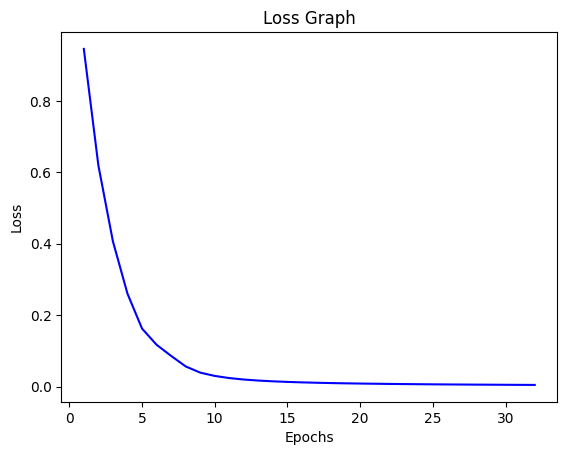

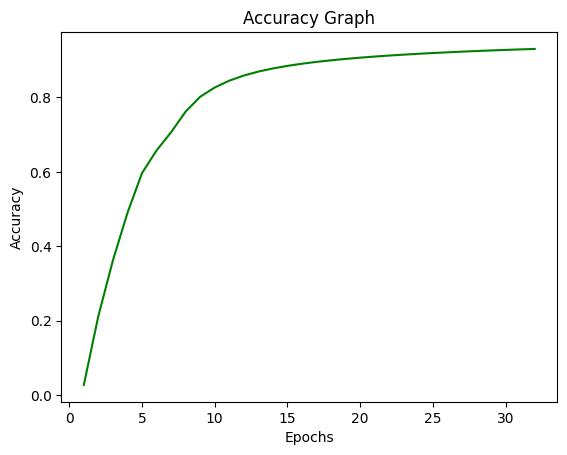

[0.95386515 0.10739999 0.01710402 0.00896745 0.01034044]
berhasil
[0.92855159 0.26966668 0.03490728 0.0119384  0.0166191 ]
berhasil
[0.77756243 0.00251427 0.03146195 0.09163121 0.01157072]
berhasil
[0.06057874 0.95252133 0.02642154 0.03764158 0.04355959]
berhasil
[0.05987801 0.94277919 0.01235321 0.00465029 0.01944743]
berhasil
[0.06905837 0.65953765 0.01477314 0.01350737 0.00509137]
berhasil
[0.00575695 0.01493977 0.80899966 0.02810912 0.00989755]
berhasil
[0.0213742  0.00246604 0.55587354 0.06187136 0.0026229 ]
berhasil
[0.00148403 0.01945283 0.40262794 0.06189462 0.02245958]
berhasil
[4.53069878e-04 2.69765183e-02 2.36215627e-02 7.95854766e-01
 3.35666081e-01]
berhasil
[0.00513329 0.02298788 0.0184704  0.96358805 0.04809256]
berhasil
[0.00132971 0.0034508  0.2695086  0.90968623 0.03765514]
berhasil
[0.02379643 0.05277043 0.02821825 0.14269528 0.55988934]
berhasil
[0.00234057 0.01483665 0.01734866 0.00793043 0.95095506]
berhasil
[0.00433106 0.00695712 0.00274278 0.3238463  0.49301584

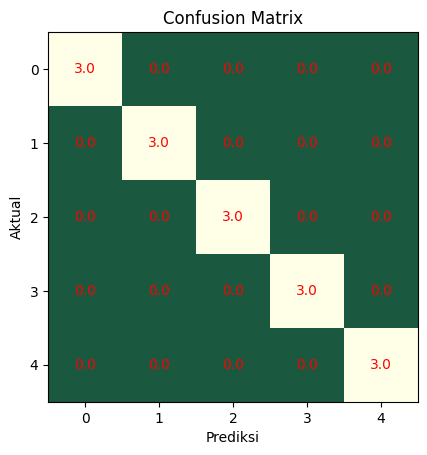

array([[3., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 3., 0., 0.],
       [0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 3.]])

In [ ]:
nn2 = NeuralNetwork_2()
nn_init_2(nn2)
train_2(ret[0],ret[1],nn2)
image_test(2)

#**Neural Network 3 Layer Tersembunyi**
Epoch akan dibatasi hingga 100 saja dan otomatis berhenti ketika loss bernilai 0,005.Output dari program ini adalah grafik loss, grafik akurasi, dan confusion matrix.

In [ ]:
nn3 = NeuralNetwork_3()
nn_init_3(nn3)
train_3(ret[0],ret[1],nn3)
image_test(3)